[tutorials](https://gist.github.com/fabian-paul/b14793bea0bf0014c1c1a2e48e24e61f)

In [1]:
%pylab inline
import pandas as pd
import pyemma
matplotlib.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


# CVs, distance

In [39]:
cvs = pd.read_csv('108/meta_0718_lab108/CVS', sep=r'\s*', header=None, comment='#')

/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [41]:
#! FIELDS time d_v12_b d_b_v3 meta.bias meta.work
# bias: the instantaneous value of the bias potential
# work: accumulator for work
cvs.columns = ['time', 'distance1', 'distance2', 'bias', 'work']
cvs[:5]

,time,distance1,distance2,bias,work
0,0.0,2.075519,1.619646,0.000000,0.000000
1,1.0,2.177365,1.732320,0.000000,0.000000
2,2.0,2.200224,1.804025,1.130038,1.500000
3,3.0,2.283586,1.830151,1.502643,2.926362
4,4.0,2.203514,1.827165,3.330090,4.329245


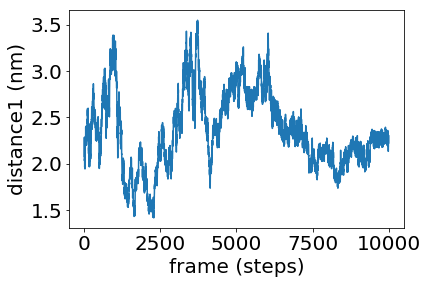

In [5]:
plot(cvs.distance1)
xlabel('frame (steps)')
ylabel('distance1 (nm)')

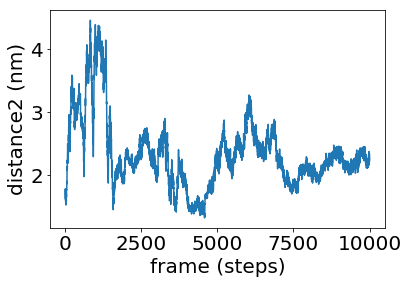

In [6]:
plot(cvs.distance2)
xlabel('frame (steps)')
ylabel('distance2 (nm)')

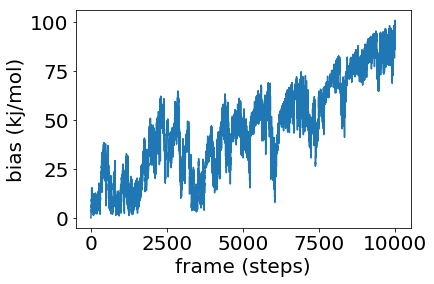

In [8]:
plot(cvs.bias)
xlabel('frame (steps)')
ylabel('bias (kj/mol)')

# HILL

In [9]:
hills = pd.read_csv('108/meta_0718_lab108/HILLS_CVS', sep=r'\s*', header=None, comment='#')

/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [18]:
#! FIELDS time d_v12_b d_b_v3 sigma_d_v12_b sigma_d_b_v3 height biasf
hills.columns = ['time', 'distance1', 'distance2', 'sigma1', 'sigma2', 'height', 'biasf']
hills[:5]

,time,distance1,distance2,sigma1,sigma2,height,biasf
0,1,2.177365,1.732320,0.1,0.1,1.666667,10
1,2,2.200224,1.804025,0.1,0.1,1.584847,10
2,3,2.283586,1.830151,0.1,0.1,1.558759,10
3,4,2.203514,1.827165,0.1,0.1,1.436897,10
4,5,2.122232,1.776587,0.1,0.1,1.436893,10


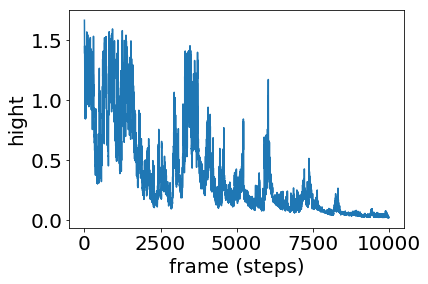

In [11]:
plot(hills.height)
xlabel('frame (steps)')
ylabel('hight')

# TRAM

In [48]:
import pyemma.coordinates as coor
ttrajs = coor.cluster_kmeans(cvs.bias,k=100)

29-08-17 10:28:15 pyemma.coordinates.clustering.kmeans.KmeansClustering[4] INFO     Cluster centers converged after 10 steps.


In [49]:
dtrajs = coor.cluster_kmeans(hills.height,k=100)

29-08-17 10:28:22 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 8 steps.


In [29]:
bias = [np.hstack((cvs.time.reshape(10001,1),cvs.bias.reshape(10001,1)))]

In [46]:
tram = pyemma.thermo.tram(ttrajs=ttrajs, dtrajs=dtrajs, bias=bias, lag=10, 
                          maxerr=1.E-12, direct_space=True, connectivity='reversible_pathways')

TypeError: Argument dtraj is not a discrete trajectory - only list of integers or int-ndarrays are allowed. Check type of KmeansClustering(fixed_seed=140568611, init_strategy='kmeans++', max_iter=10,
         metric='euclidean', n_clusters=100, n_jobs=4,
         oom_strategy='memmap', skip=0, stride=1, tolerance=1e-05)